### Importing Python Libraries

# <span style="color:Blue">Why Linear Regression cannot be used for Classification?

In [16]:
import pandas as pd
import numpy as np
from sklearn import datasets
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

### Showing Sample Data in One Dimension (univariate)

In [17]:
data=pd.read_csv("a.csv",header=None)
data=data.drop(0,axis=1) #dropping index names
target=data.iloc[:,0]
X=data.drop(1,axis=1)

lb_make = LabelEncoder()
targ=lb_make.fit_transform(target)
#y_tst=lb_make.fit_transform(y_test)
#Applying PCA reducing to one variable
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(X)
principalDf= pd.DataFrame(data = principalComponents.round(), columns = ['principal component 1'])

#locs, labels = xticks()
X_train, X_test, y_train, y_test = train_test_split(principalDf,targ, test_size=0.30,random_state=101)
df=pd.DataFrame({})
df['Y']=pd.Series(y_train).reset_index(drop=True)
df['Parameter']=X_train.reset_index(drop=True)
df.head(10)

,Y,Parameter
0,0,-301.0
1,0,-59.0
2,1,91.0
3,1,98.0
4,0,-635.0
5,0,-427.0
6,0,-91.0
7,0,-359.0
8,0,-441.0
9,0,-444.0


#### * 0 Denotes No Breast Cancer Detected
#### * 1 Denotes Harmful breast Cancer Detected
#### * Parameter value is the predictor for Breast Cancer ~ y=f(x), x is Predictor or Variable or feature or attribute

### <span style="color:Orange">Plot of The Breast Cancer Data </span>

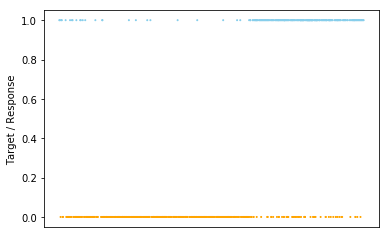

In [18]:

plt.scatter(principalDf,targ,s=1,c=np.where(targ==0,'orange','skyblue'))
#plt.scatter(principalDf.iloc[np.where(target=='B')[0]],target[target=='B'],s=1,c='blue')
#plt.xlabel('Variable')
plt.ylabel("Target / Response")
plt.xticks([])

plt.show()


## <span style="color:Blue">Fitting Least Squares on the Train Data

In [19]:
model=sm.OLS(X_train, y_train).fit()
pred=model.predict(X_test)
#print(class(X_test))
df1=pd.DataFrame({})
#df
#df['Test Attributes / X']=pred.reset_index(drop=True)
df1['Predictions']=pd.Series(pred).reset_index(drop=True)
df1['Test Attributes / X']=X_test.reset_index(drop=True)
df1.head(10)

,Predictions,Test Attributes / X
0,-247526.260274,-387.0
1,-86346.369863,-135.0
2,-200195.657534,-313.0
3,246247.054795,385.0
4,-259039.109589,-405.0
5,-144550.219178,-226.0
6,-468189.205479,-732.0
7,948530.863014,1483.0
8,-202754.068493,-317.0
9,-335151.835616,-524.0


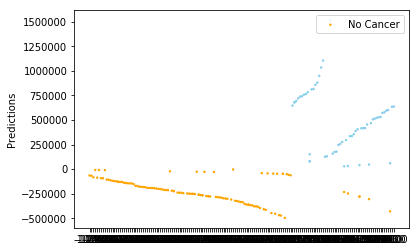

In [20]:
#print(pred)
plt.scatter(X_test,pred,s=2,c=np.where(pred<0,"orange","skyblue"))
#plt.xlabel("Variable")
plt.legend(("No Cancer","With Cancer"),loc='upper right')
plt.ylabel("Predictions")
plt.show()

#print(classification_report(y_tst,pred))

### <span style="color:Orange">Individuals without Cancer </span>
### <span style="color:skyblue">Individuals with Cancer </span>

## <span style="color:darkgreen"> Trying the same test Data with Logistic regression 

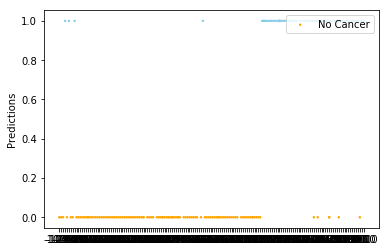

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred=logreg.predict(X_test)
#print(pred)
plt.scatter(X_test,pred,s=2,c=np.where(pred<=0,"orange","skyblue"))
#plt.xlabel("Variable")
plt.legend(("No Cancer","With Cancer"),loc='upper right')
plt.ylabel("Predictions")
plt.show()

#print(classification_report(y_tst,pred))

#print(classification_report(y_test,pred))

### <span style="color:Orange">Individuals without Cancer </span>
### <span style="color:skyblue">Individuals with Cancer </span>